<a href="https://colab.research.google.com/github/AagmanBhatia/Computer-Vision-Project/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Histogram Equalization and Adaptive Histogram Equalization on gray scale image

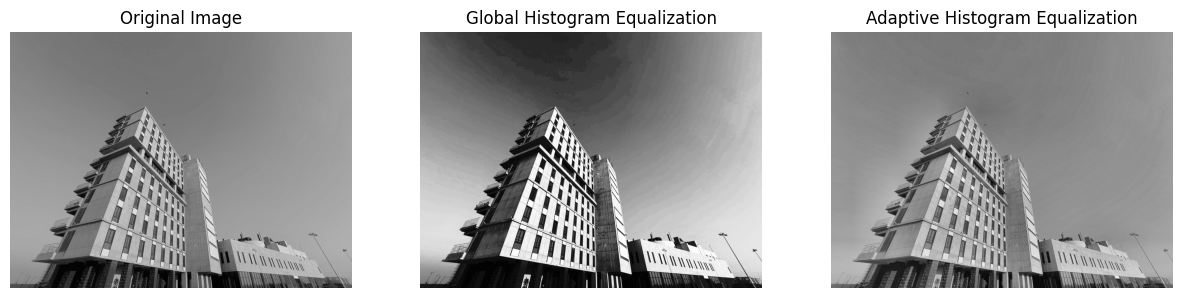

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization_gray(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply global histogram equalization
    equalized_img = cv2.equalizeHist(img)

    # Apply adaptive histogram equalization
    # The clip limit is a threshold set for each tile.
    # If the number of pixels in a particular intensity bin (histogram bin) exceeds this threshold,
    # the excess pixels are redistributed to other bins.
    # tile grid size determines the size of the grid used to divide the image into tiles or patches.
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    adaptive_equalized_img = clahe.apply(img)

    # Display the original, global equalized, and adaptive equalized images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title('Global Histogram Equalization')
    plt.imshow(equalized_img, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title('Adaptive Histogram Equalization')
    plt.imshow(adaptive_equalized_img, cmap='gray')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/computer vision project/IMPORTANT/contrastless.jpg'
histogram_equalization_gray(image_path)


### Adaptive Histogram Equalization on colored image

L (Lightness):* This channel represents the perceived brightness or intensity of the color.

a (Green to Red):* The a* channel represents the color on a green-to-red axis.

b (Blue to Yellow):* The b* channel represents the color on a blue-to-yellow axis.

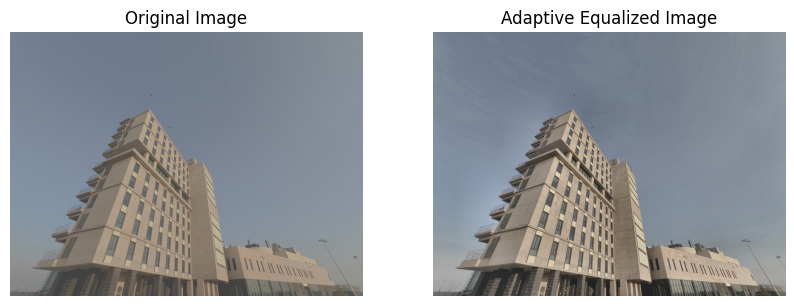

In [ ]:
def adaptive_histogram_equalization_colored_image(image_path, clip_limit=2.0, tile_size=(8, 8)):
    # Read the colored image
    img = cv2.imread(image_path)

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Apply adaptive histogram equalization to the L channel
    l_channel = lab_img[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    l_channel_equalized = clahe.apply(l_channel)

    # Replace the equalized L channel in the LAB image
    lab_img[:,:,0] = l_channel_equalized

    # Convert the image back to BGR color space
    equalized_img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)

    # Display the original and equalized images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Adaptive Equalized Image')
    plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/computer vision project/IMPORTANT/contrastless.jpg'
adaptive_histogram_equalization_colored_image(image_path)


## Contrast restoration scene structure on gray image

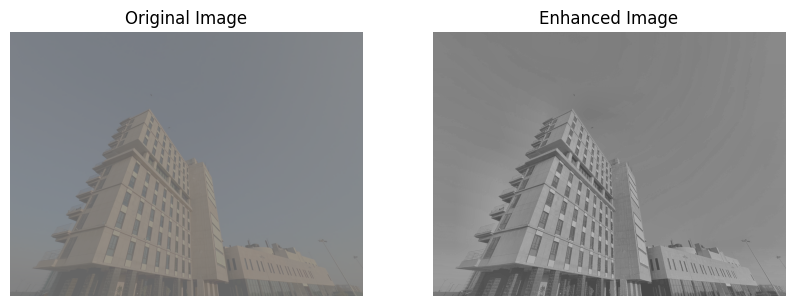

In [ ]:
def contrast_restoration_scene_structure_gray(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive histogram equalization to enhance local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    # Apply a sharpening filter to increase clarity
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    enhanced_img = cv2.filter2D(enhanced_img, -1, kernel)

    # Display the original and enhanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(enhanced_img, cmap='gray')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/computer vision project/IMPORTANT/IMG_1488.png'
contrast_restoration_scene_structure_gray(image_path)


## Contrast restoration scene structure on colored image

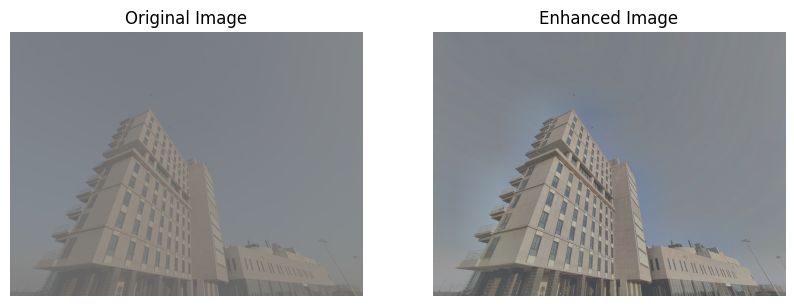

In [ ]:
def contrast_restoration_scene_structure_colored(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Split the image into color channels
    channels = cv2.split(img)

    # Apply contrast enhancement to each color channel
    enhanced_channels = [enhance_channel(channel) for channel in channels]

    # Merge the enhanced color channels
    enhanced_img = cv2.merge(enhanced_channels)

    # Display the original and enhanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def enhance_channel(channel):
    # Apply adaptive histogram equalization to enhance local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_channel = clahe.apply(channel)

    # Apply a sharpening filter to increase clarity
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    enhanced_channel = cv2.filter2D(enhanced_channel, -1, kernel)

    return enhanced_channel

image_path = '/content/drive/MyDrive/computer vision project/IMPORTANT/IMG_1488.png'
contrast_restoration_scene_structure_colored(image_path)


### Contrast restoration scene structure using CLAHE

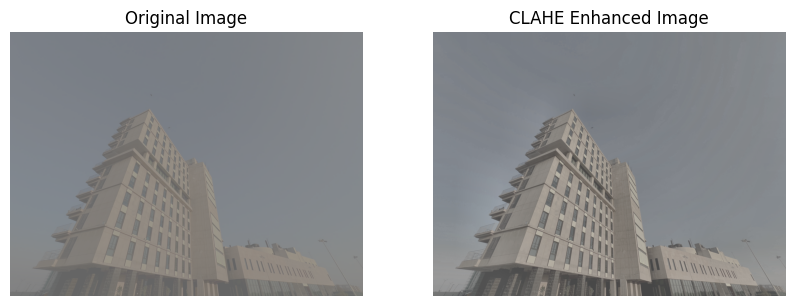

In [ ]:
def contrast_restoration_scene_structure_clahe(image_path, clip_limit=2.0, tile_size=(8, 8)):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Apply CLAHE to the L channel (luminance)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    lab_img[:, :, 0] = clahe.apply(lab_img[:, :, 0])

    # Convert the image back to BGR color space
    enhanced_img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)

    # Display the original and enhanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('CLAHE Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/computer vision project/IMPORTANT/IMG_1488.png'
contrast_restoration_scene_structure_clahe(image_path)
